Import Data

In [17]:
#import DataFetcher class from file heart_data.py
import DataFetcher #importing the file DataFetcher.py from the folder data
data_fetcher = DataFetcher.DataFetcher("C:\\Users\\kruth\\OneDrive\\Desktop\\Cardiac_Events_ML\\preprocessing\\final_dataset.csv")
X_train = data_fetcher.get_X_train()
X_test = data_fetcher.get_X_test()
y_train = data_fetcher.get_y_train()
y_test = data_fetcher.get_y_test()
features = data_fetcher.get_features()
target_names = data_fetcher.get_target_names()
X = data_fetcher.get_X()
y = data_fetcher.get_y()

Feature Scaling

In [18]:
#scaling the feature dataset:
from sklearn.preprocessing import StandardScaler 
# fit the Scaler
scaler = StandardScaler() #creating an instance of the StandardScaler class.
#Scaling the values such that the mean is 0 and std deviation is 1.
scaler.fit(X_train) #fitting the scaler to the training set.
X_train = scaler.transform(X_train) #transforming the training set. 
X_test = scaler.transform(X_test) #transforming the testing set.

Initial Model

In [19]:
#import the LogisticRegression class from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# train the model
lr_1 = LogisticRegression()

#fitting the model to the training set.
lr_1.fit(X_train, y_train) 

# make predictions on the test dataset
y_pred_1 = lr_1.predict(X_test)

#---------------------------------Evaluating the model---------------------------------

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Initial Logistic Regression Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred_1))
print("Precision:", precision_score(y_test, y_pred_1))
print("Recall:", recall_score(y_test, y_pred_1))
print("F1 Score:", f1_score(y_test, y_pred_1))
#meaning of accuracy score: 0.9 means 90% of the predictions are correct

#classification_report
print("\n----------Initial Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred_1)
print(cr)


----------Initial Logistic Regression Metrics----------

Accuracy: 0.8666666666666667
Precision: 0.868421052631579
Recall: 0.9166666666666666
F1 Score: 0.8918918918918918

----------Initial Classification Report----------

              precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.87      0.92      0.89        36

    accuracy                           0.87        60
   macro avg       0.87      0.85      0.86        60
weighted avg       0.87      0.87      0.87        60



Hyperparameter Tuning using Grid Search

In [20]:
#perform grid search to find the best parameters for the model
from sklearn.model_selection import GridSearchCV
#creating a dictionary of parameters to be used in the grid search:
param_grid = {'C': [0.0001,0.001, 0.01], 'penalty': ['l1', 'l2'], 'solver': ['liblinear','saga'], 'max_iter': [100],'random_state': [42]}
#creating an instance of the GridSearchCV class:
grid = GridSearchCV(LogisticRegression(), param_grid, cv = 10, scoring='f1')

#fitting the grid search to the training set:
lr_tuned = grid.fit(X_train, y_train)
#finding the best estimator:
print("\nbest estimator: ", lr_tuned.best_estimator_)
#finding the best score:
print("best score:  ", lr_tuned.best_score_)


best estimator:  LogisticRegression(C=0.01, random_state=42, solver='liblinear')
best score:   0.8381199491829177


Testing of Final Model

In [21]:
#test the new model with hyperparameters tuned by grid search:
#make predictions on the test dataset
y_pred = lr_tuned.predict(X_test)

# Evaluate the model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("\n----------Logistic Regression Metrics----------\n")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

#classification_report
print("\n----------Classification Report----------\n")
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)



----------Logistic Regression Metrics----------

Accuracy: 0.9
Precision: 0.875
Recall: 0.9722222222222222
F1 Score: 0.9210526315789473

----------Classification Report----------

              precision    recall  f1-score   support

           0       0.95      0.79      0.86        24
           1       0.88      0.97      0.92        36

    accuracy                           0.90        60
   macro avg       0.91      0.88      0.89        60
weighted avg       0.90      0.90      0.90        60



Confusion Matrix

[[19  5]
 [ 1 35]]


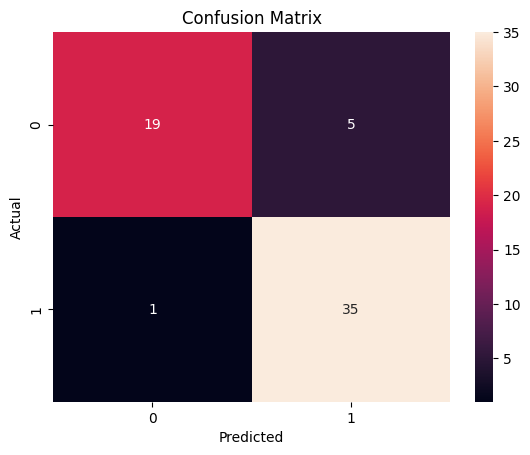

In [22]:
#get the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

#visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d") #fmt="d" means the values in the matrix are integers  
#annot=True means the values in the matrix are displayed
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [27]:
#cross validation for 10 folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_tuned, X_train, y_train, cv=10, scoring="f1") #scoring can be accuracy, precision, recall, f1, roc_auc, etc
#get the scores for each fold
for i in range(10):
    print("Fold", i, ":", scores[i])
    
#get the mean of the scores
print("\nMean:", scores.mean())
#get the standard deviation of the scores
print("Standard Deviation:", scores.std()) #the lower the standard deviation, the better the model
#standard deviation is calculated for the scores of each fold

Fold 0 : 0.7857142857142856
Fold 1 : 0.8461538461538461
Fold 2 : 0.8799999999999999
Fold 3 : 0.8666666666666666
Fold 4 : 0.7692307692307693
Fold 5 : 0.8461538461538461
Fold 6 : 0.8275862068965517
Fold 7 : 0.8799999999999999
Fold 8 : 0.7826086956521738
Fold 9 : 0.7692307692307692

Mean: 0.8253345085698907
Standard Deviation: 0.04271704023457498
